# Seaborn Basics

Here we will focus on some very basic

## The Data

Context

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Columns
* age  age in years
* sex  (1 = male; 0 = female)
* cp  chest pain type
* trestbps   resting blood pressure (in mm Hg on admission to the hospital)
* cholserum   cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg   resting electrocardiographic results
* thalach   maximum heart rate achieved
* exang    exercise induced angina (1 = yes; 0 = no)
* oldpeak   ST depression induced by exercise relative to rest
* slope    the slope of the peak exercise ST segment
* ca    number of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target   1 or 0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Distribution Plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


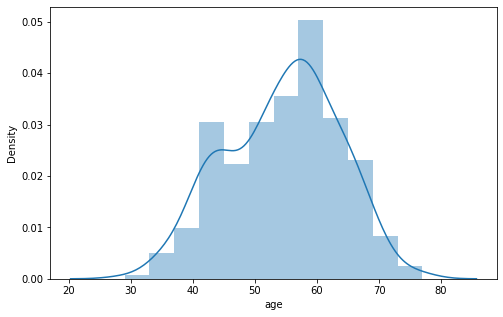

In [13]:
# histograma
plt.figure(figsize = (8,5))
sns.distplot(df['age']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


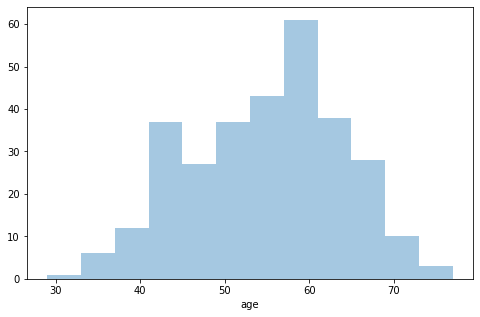

In [15]:
# removendo linha de estimação de densidade
plt.figure(figsize = (8,5))
sns.distplot(df['age'], kde = False);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


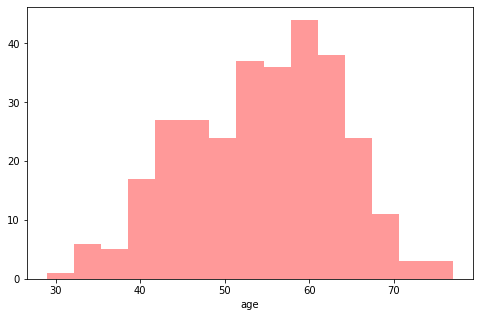

In [18]:
# bins and color
plt.figure(figsize = (8,5))
sns.distplot(df['age'], kde = False, bins = 15, color = 'r');

# Count Plot

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


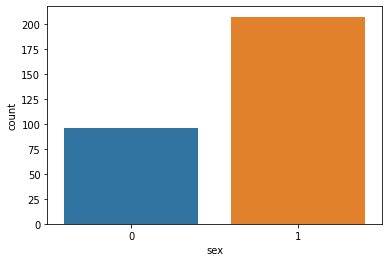

In [25]:
sns.countplot(x = 'sex', data = df)

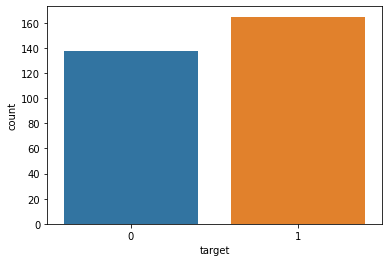

In [26]:
# quantas pessoas tem doenças ou não
sns.countplot(x = 'target', data = df)

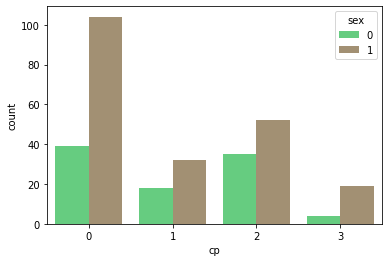

In [31]:
# adicionando outra variável
sns.countplot(x='cp',data=df, hue = 'sex', palette='terrain')

## Box Plot

Box plots show the distributions across different categories.

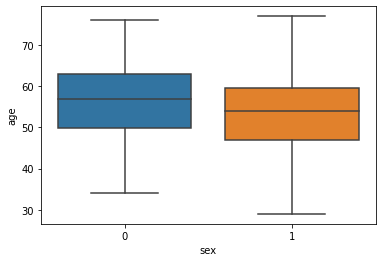

In [37]:
# distribuição das idades separadas por sexo
sns.boxplot(x='sex',y='age',data=df); # y: contínua, x: categórica

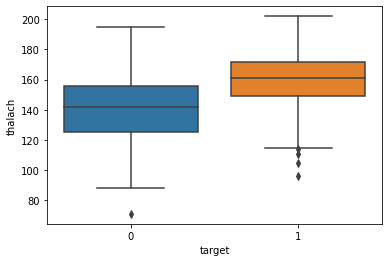

In [36]:
sns.boxplot(x='target',y='thalach',data=df);

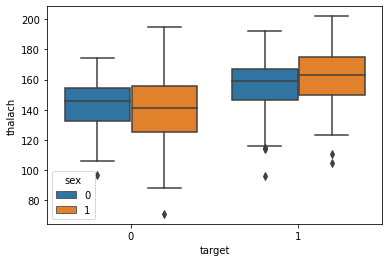

In [35]:
# separado por outra categoria
sns.boxplot(x='target',y='thalach',data=df,hue='sex');

## Scatter  Plots

Scatter plots display the relationship between two continuous features.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

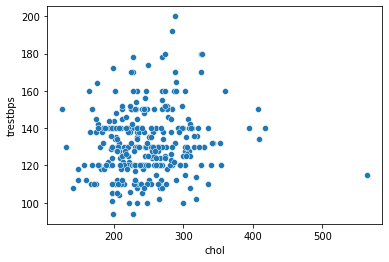

In [46]:
sns.scatterplot(x='chol',y='trestbps',data=df);

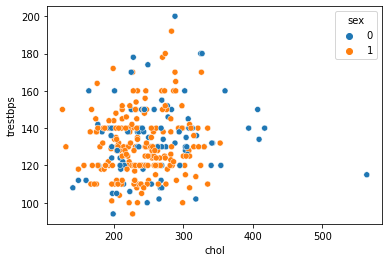

In [45]:
# separando por categoria
sns.scatterplot(x='chol',y='trestbps',data=df, hue = 'sex');

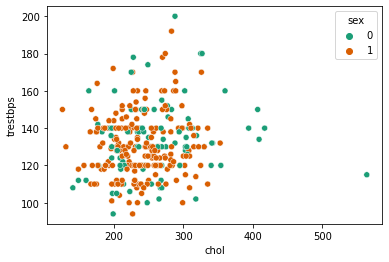

In [44]:
# mudando palette
sns.scatterplot(x='chol',y='trestbps',data=df,hue='sex',palette='Dark2');

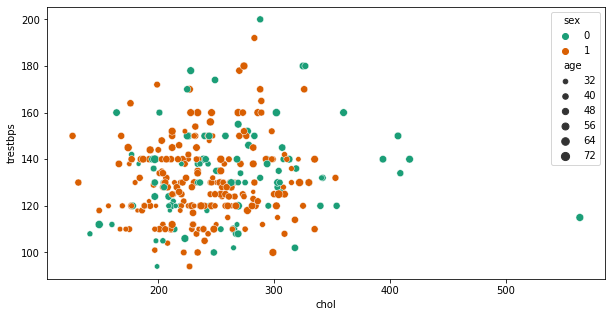

In [43]:
# tamando dos pontos por categoria
plt.figure(figsize=(10,5))
sns.scatterplot(x='chol',y='trestbps',data=df,hue='sex',palette='Dark2', size = 'age');

## Pairplots

Pairplots perform scatterplots and histograms for every single column in your data set. This means it could be a huge plot for large datasets! Use with caution, as it could take a long time for large datasets and the figures could be too small!

INFO: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [47]:
iris = pd.read_csv('iris.csv')

In [48]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


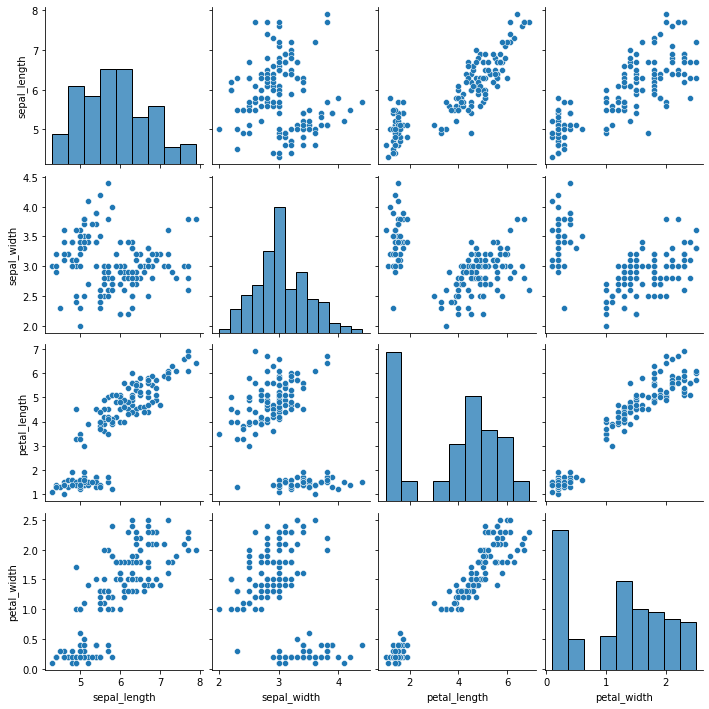

In [50]:
# plot um scatter entre as variáveis e também a distribuição de cada uma
sns.pairplot(iris);

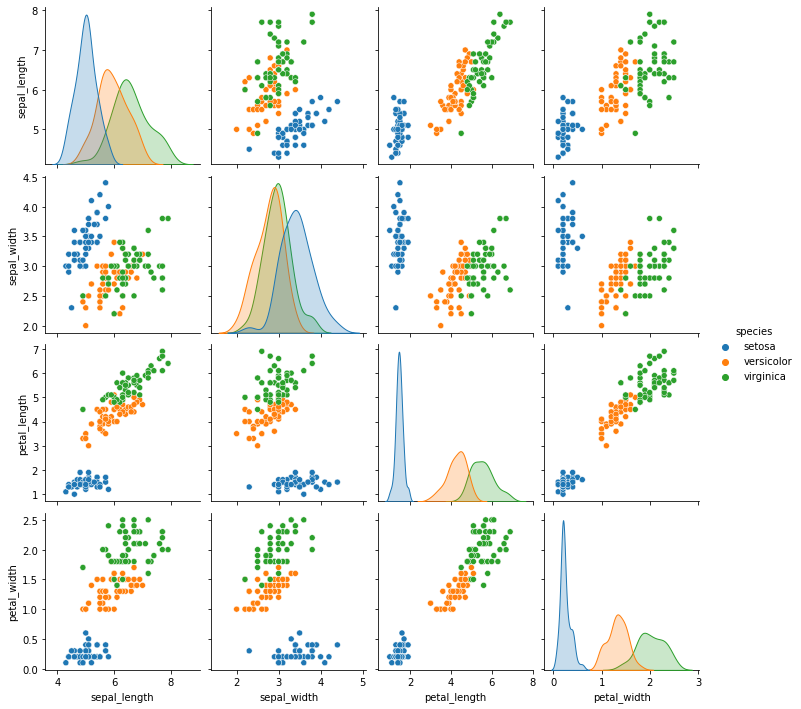

In [51]:
# hue shows KDEs instead of histograms along the diagonal
sns.pairplot(iris, hue="species");

<Figure size 720x360 with 0 Axes>

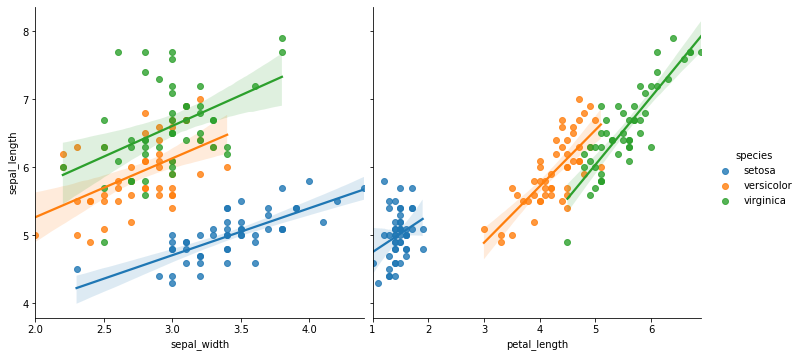

In [59]:
# para grandes dataset, podemos limitar as variáveis no pairplot
plt.figure(figsize=(10,5))
sns.pairplot(iris, y_vars= 'sepal_length', x_vars = ['sepal_width', 'petal_length'], kind = 'reg', hue = 'species', height=5);